In [5]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [8]:
ipd.Audio('C:/Users/user/Desktop/Ai/Audio Work With Librosa week 14/mini-genres/classical/classical.00000.au')

# sr is resampling rate, sr value big means better quality of audio

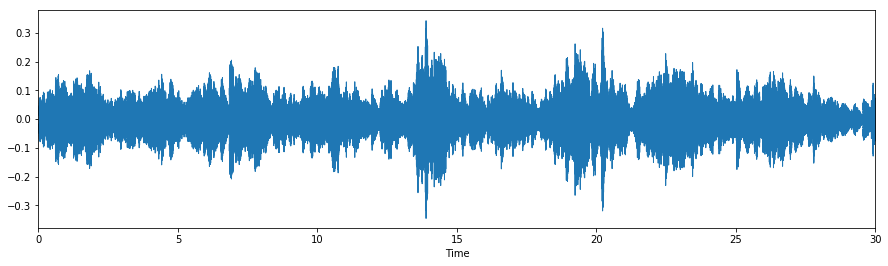

In [9]:

single_audio = 'C:/Users/user/Desktop/Ai/Audio Work With Librosa week 14/mini-genres/classical/classical.00000.au'
plt.figure(figsize=(15,4))
data1,sample_rate1 = librosa.load(filename1, sr=22050, mono=True, offset=0.0, duration=50, res_type='kaiser_best')
librosa.display.waveplot(data1,sr=sample_rate1, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000)


# Spectrogram

In [13]:
x , sr = librosa.load(single_audio)

In [20]:
x.shape

(661794,)

# Short Term Fourier Transformation

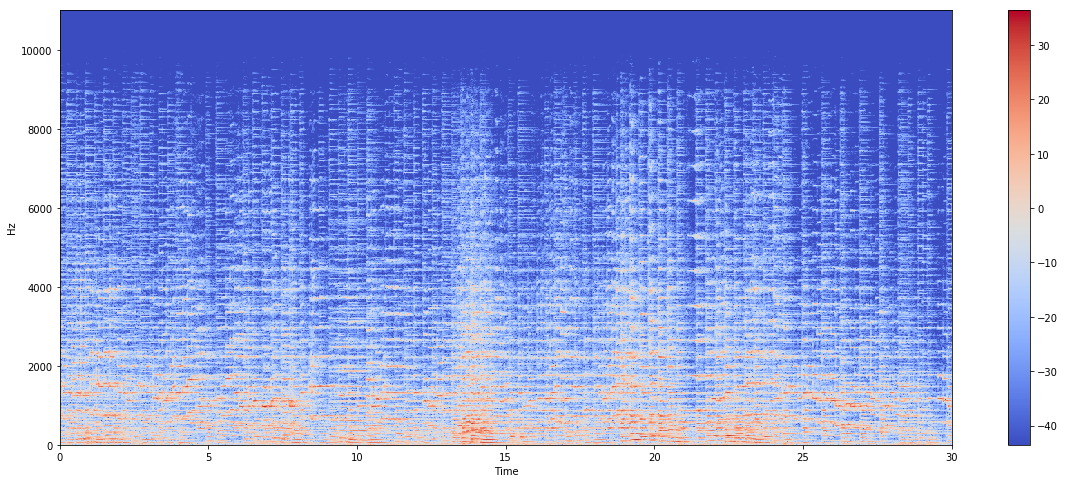

In [30]:
X = librosa.stft(data1)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 8))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

# Feature Extraction

# Waveform / WavePlot

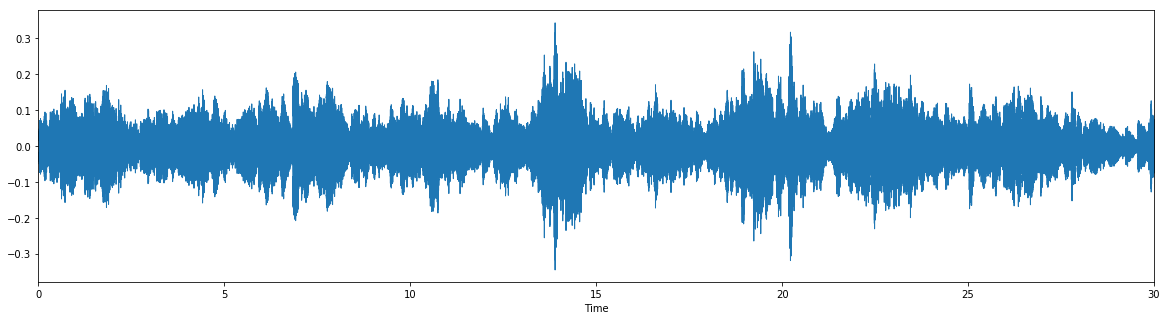

In [19]:
%matplotlib inline
import sklearn
plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr)


# Zero Crossing Rate

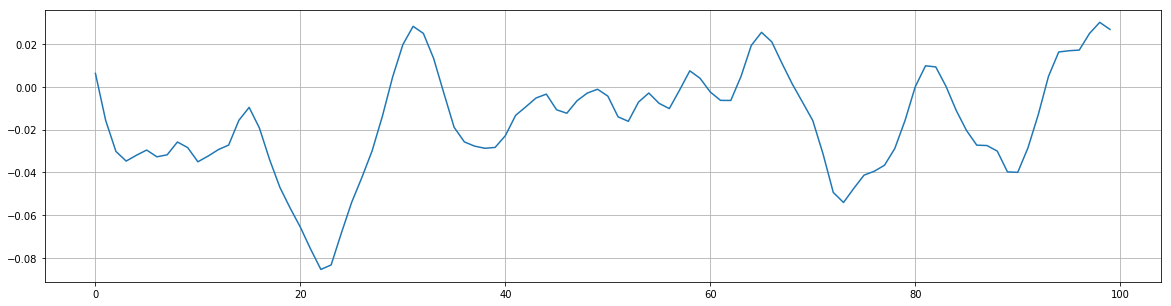

In [18]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

# MFCC

(20, 1293)


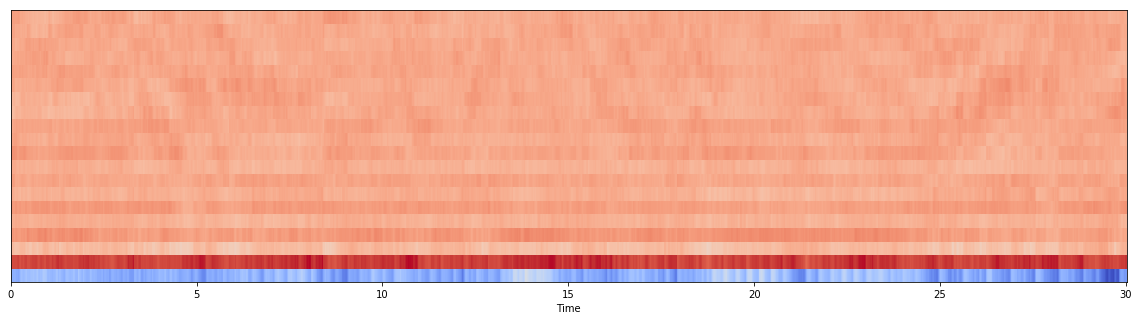

In [24]:
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [32]:
print (mfccs)

[[-2.52538361e+02 -2.56775269e+02 -2.72117126e+02 ... -3.07149078e+02
  -3.13100433e+02 -3.10107483e+02]
 [ 1.09916336e+02  1.15314880e+02  1.19419044e+02 ...  1.34084930e+02
   1.34168182e+02  1.44253967e+02]
 [-2.11918507e+01 -2.88012352e+01 -2.91280479e+01 ... -1.70843868e+01
  -1.58547630e+01 -1.34419498e+01]
 ...
 [ 6.08554649e+00  5.55356693e+00  4.44708443e+00 ... -5.92226696e+00
  -6.72776747e+00 -5.64208555e+00]
 [ 1.35431232e+01  1.35825462e+01  9.97626495e+00 ... -3.31203794e+00
   2.36281157e-02 -3.87738276e+00]
 [ 1.13439493e+01  1.52020674e+01  1.66675930e+01 ... -4.05387497e+00
  -6.14867401e+00 -7.89516830e+00]]


# Chroma Stft

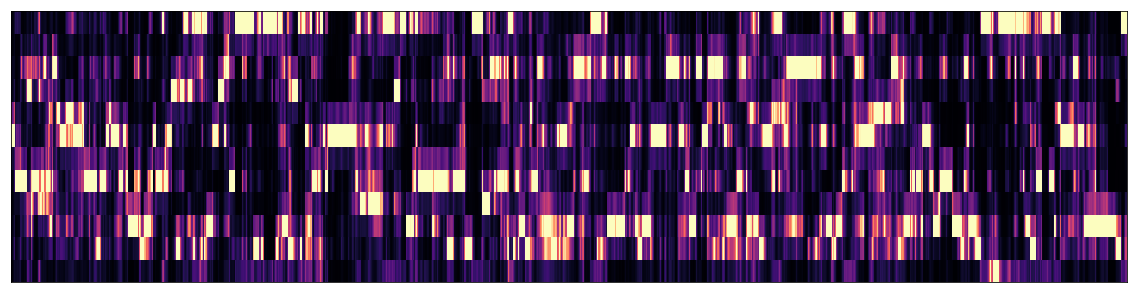

In [64]:
feature_chroma=librosa.feature.chroma_stft(x,sr=sr)
plt.figure(figsize=(20, 5))
librosa.display.specshow(feature_chroma)

# Spectral Centroid

In [27]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(1293,)

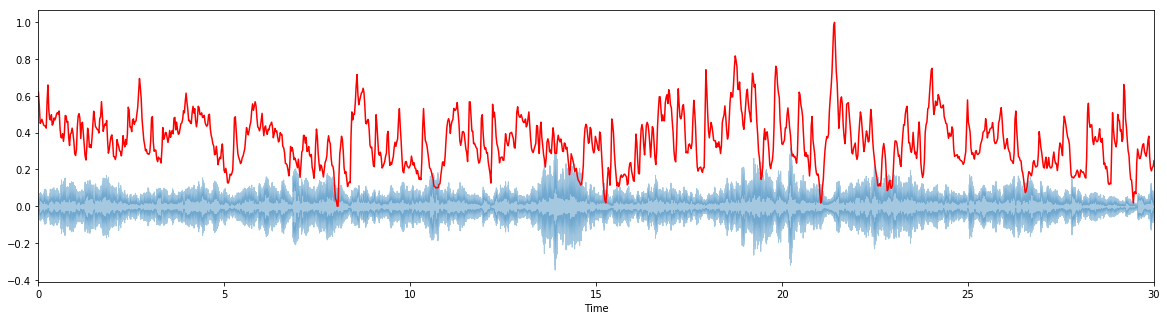

In [28]:
# Computing the time variable for visualization
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

# Spectral Rolloff

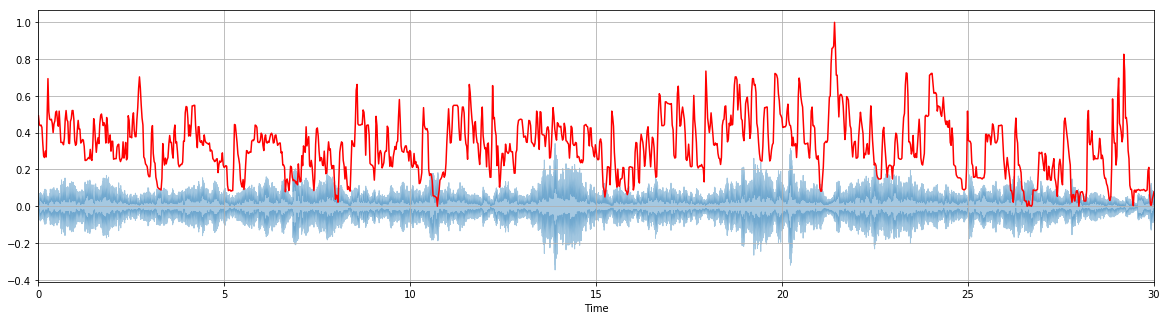

In [29]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

In [38]:
import pandas as pd
import numpy as np
import PIL as image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [46]:
df=pd.DataFrame(columns=['chroma_stft','spectral_centroid','spectral_rolloff'])

for i in range (1,21):
    df[f'mfcc_{i}']=""
df['genre']=""

In [47]:
df


,chroma_stft,spectral_centroid,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,genre


In [48]:
path='C:\\Users\\user\\Desktop\\Ai\\Audio Work With Librosa week 14\\mini-genres'

In [51]:
import os

In [55]:
os.getcwd()

'C:\\Users\\user'

In [56]:
os.listdir()

['.anaconda',
 '.conda',
 '.condarc',
 '.dnx',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.node_repl_history',
 '.packettracer',
 '.PyCharm40',
 '.spss',
 '.spyder-py3',
 '.thumbnails',
 '12dec knn model + link with flask api .ipynb',
 '12dec knn+logistic.ipynb',
 '3D Objects',
 'AppData',
 'Application Data',
 'Applying data science with python.ipynb',
 'Audio Work With Librosa week 14.ipynb',
 'chromedriver.exe',
 'Cisco Packet Tracer 6.0',
 'cleaned_train.csv',
 'Clustering unsupervised work.ipynb',
 'Contacts',
 'Cookies',
 'dataframe_csv.pkl',
 'Desktop',
 'DFS Search.ipynb',
 'Documents',
 'Downloads',
 'Favorites',
 'flask',
 'gui_digit_recognizer.py',
 'hotel-reviews.csv',
 'IMDB Dataset.csv',
 'IntelGraphicsProfiles',
 'IRIS.csv',
 'Irisflower(pythonprog).ipynb',
 'K-Mean-Unsupervised_MUJQ.ipynb',
 'Knn EDA.ipynb',
 'KNN-notebook.ipynb',
 'knn_model.pkl',
 'Lab 2.ipynb',
 'Lab1.ipynb',
 'LAB4(DAY ONE).ipynb',
 'Life Expectancy Data.csv',
 'L

In [57]:
audio_list=os.listdir(path)

In [62]:
genres=['classical','rock']

In [68]:
all_features=[]
for genre in genres:
    for filename in os.listdir(f'mini-genres/{genre}'):
        songname=f'mini-genres/{genre}/{filename}'
        x,sr=librosa.load(songname, mono=True, duration=30)
        mfccs = librosa.feature.mfcc(x, sr=sr)
        feature_chroma=librosa.feature.chroma_stft(x,sr=sr)
        spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)
        spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)
        feature_list=[np.mean(feature_chroma),np.mean(spectral_centroids),np.mean(spectral_rolloff)]
        for feature in mfccs:
            feature_list.append(np.mean(feature))
        feature_list.append(genre)
        all_features.append(feature_list)

In [70]:
df=pd.DataFrame(all_features,columns=df.columns)

In [71]:
df

,chroma_stft,spectral_centroid,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,genre
0,0.252391,1505.299012,2717.008571,-268.155945,135.689575,-34.070629,25.630829,-12.969512,17.891945,-9.996482,...,8.261254,-1.352932,-0.382258,1.031764,3.807188,-0.303796,1.778557,0.890327,-0.837884,classical
1,0.215064,1360.408354,2387.218898,-324.058777,133.610046,-25.031099,24.567553,-11.933687,17.662527,-5.530694,...,3.522399,5.041736,1.361833,3.003345,-3.124862,-4.291534,0.591218,2.871973,0.366271,classical
2,0.277865,1490.034810,2784.916493,-235.255798,141.128189,-34.666855,30.979235,-16.377935,23.111984,-11.031445,...,8.909784,-1.433872,4.281025,1.482140,3.187975,-1.309518,2.929819,-1.661003,-2.896665,classical
3,0.234236,1526.647067,2915.974034,-326.864838,127.391304,-30.596096,37.468800,-5.296103,20.810871,-1.778644,...,2.807639,7.252175,3.980639,-2.389036,1.490969,0.583444,-0.610587,2.334468,2.649743,classical
4,0.223171,1705.704611,3175.739130,-259.909973,118.939293,-35.611851,31.977633,-16.529282,10.622128,-15.651278,...,-1.196832,-6.347266,2.761452,-2.592574,4.384808,-4.136895,-4.779474,-4.772360,-4.608321,classical
5,0.268582,1431.427561,2836.657847,-264.247345,138.148911,-30.094566,37.815590,-7.173774,6.776308,-11.798505,...,2.667867,-4.791536,-1.404992,-2.094342,2.984210,3.361477,4.814611,1.761761,-1.826766,classical
6,0.261489,1372.825807,2737.933444,-295.702881,134.535095,-22.447182,40.741524,-5.877058,9.267067,-11.864938,...,4.062370,1.628092,5.138569,5.442817,2.285079,-1.816668,-2.923230,0.135035,3.197437,classical
7,0.276529,1358.918358,2667.900534,-286.838440,135.919449,-24.437115,36.648640,-6.234456,6.954074,-8.162778,...,1.543668,-4.346957,-3.018978,-0.005314,5.652414,3.437010,2.830977,1.097174,-0.294304,classical
8,0.254774,1516.626219,2973.782018,-292.128296,127.769051,-29.901041,37.430187,-9.547024,5.113703,-13.811696,...,4.709107,0.377206,1.464333,3.393673,6.076538,0.963429,-0.753660,-2.105313,0.755133,classical
9,0.270478,1216.293762,2560.259518,-356.142212,139.805801,-6.278478,43.176289,-8.859081,11.042577,-8.373959,...,3.424294,-1.438335,-0.419472,-1.726719,-0.283630,-0.653538,1.160549,-0.624841,-0.257531,classical


In [75]:
scaler=StandardScaler()
X=scaler.fit_transform(np.array(df.iloc[:,:-1],dtype=float))
X.shape

(20, 23)

In [76]:
df2=df['genre']
y=df2

In [78]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size = 0.3, random_state = 0)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

model.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [86]:
y_pred=model.predict(x_test)

In [87]:
from sklearn import metrics

In [89]:
acc_clf=metrics.accuracy_score(y_test,y_pred)
print("classifier accuracy", str(acc_clf) )

classifier accuracy 0.8333333333333334


# Multi Class

In [91]:
genres_mc=['classical','rock','jazz','metal','pop']

In [92]:
all_features=[]
for genre in genres_mc:
    for filename in os.listdir(f'mini-genres/{genre}'):
        songname=f'mini-genres/{genre}/{filename}'
        x,sr=librosa.load(songname, mono=True, duration=30)
        mfccs = librosa.feature.mfcc(x, sr=sr)
        feature_chroma=librosa.feature.chroma_stft(x,sr=sr)
        spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)
        spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)
        feature_list=[np.mean(feature_chroma),np.mean(spectral_centroids),np.mean(spectral_rolloff)]
        for feature in mfccs:
            feature_list.append(np.mean(feature))
        feature_list.append(genre)
        all_features.append(feature_list)

In [100]:
df=pd.DataFrame(all_features,columns=df.columns)

In [101]:
df

,chroma_stft,spectral_centroid,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,genre
0,0.252391,1505.299012,2717.008571,-268.155945,135.689575,-34.070629,25.630829,-12.969512,17.891945,-9.996482,...,8.261254,-1.352932,-0.382258,1.031764,3.807188,-0.303796,1.778557,0.890327,-0.837884,classical
1,0.215064,1360.408354,2387.218898,-324.058777,133.610046,-25.031099,24.567553,-11.933687,17.662527,-5.530694,...,3.522399,5.041736,1.361833,3.003345,-3.124862,-4.291534,0.591218,2.871973,0.366271,classical
2,0.277865,1490.034810,2784.916493,-235.255798,141.128189,-34.666855,30.979235,-16.377935,23.111984,-11.031445,...,8.909784,-1.433872,4.281025,1.482140,3.187975,-1.309518,2.929819,-1.661003,-2.896665,classical
3,0.234236,1526.647067,2915.974034,-326.864838,127.391304,-30.596096,37.468800,-5.296103,20.810871,-1.778644,...,2.807639,7.252175,3.980639,-2.389036,1.490969,0.583444,-0.610587,2.334468,2.649743,classical
4,0.223171,1705.704611,3175.739130,-259.909973,118.939293,-35.611851,31.977633,-16.529282,10.622128,-15.651278,...,-1.196832,-6.347266,2.761452,-2.592574,4.384808,-4.136895,-4.779474,-4.772360,-4.608321,classical
5,0.268582,1431.427561,2836.657847,-264.247345,138.148911,-30.094566,37.815590,-7.173774,6.776308,-11.798505,...,2.667867,-4.791536,-1.404992,-2.094342,2.984210,3.361477,4.814611,1.761761,-1.826766,classical
6,0.261489,1372.825807,2737.933444,-295.702881,134.535095,-22.447182,40.741524,-5.877058,9.267067,-11.864938,...,4.062370,1.628092,5.138569,5.442817,2.285079,-1.816668,-2.923230,0.135035,3.197437,classical
7,0.276529,1358.918358,2667.900534,-286.838440,135.919449,-24.437115,36.648640,-6.234456,6.954074,-8.162778,...,1.543668,-4.346957,-3.018978,-0.005314,5.652414,3.437010,2.830977,1.097174,-0.294304,classical
8,0.254774,1516.626219,2973.782018,-292.128296,127.769051,-29.901041,37.430187,-9.547024,5.113703,-13.811696,...,4.709107,0.377206,1.464333,3.393673,6.076538,0.963429,-0.753660,-2.105313,0.755133,classical
9,0.270478,1216.293762,2560.259518,-356.142212,139.805801,-6.278478,43.176289,-8.859081,11.042577,-8.373959,...,3.424294,-1.438335,-0.419472,-1.726719,-0.283630,-0.653538,1.160549,-0.624841,-0.257531,classical


In [103]:
X2=scaler.fit_transform(np.array(df.iloc[:,:-1],dtype=float))
X2.shape

(50, 23)

In [104]:
df3=df['genre']
y=df3

In [105]:
x_train,x_test,y_train,y_test=train_test_split(X2,y,test_size = 0.3, random_state = 0)

In [106]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [107]:
y_pred=model.predict(x_test)

In [108]:
acc_clf=metrics.accuracy_score(y_test,y_pred)
print("classifier accuracy", str(acc_clf) )

classifier accuracy 0.7333333333333333
